<a href="https://colab.research.google.com/github/gantapriyanka1325/DeepLearningLab/blob/main/Program5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5) Design and implement to classify 32x32 images using MLP using tensor flow/keras and check the accuracy.



In [1]:
#1) Imports & environment setup
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report


In [28]:
#2) Load CIFAR-10 batch from pickle
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.keras.backend.clear_session()

with open("/content/data_batch_1", "rb") as f:
    batch = pickle.load(f, encoding='bytes')

X = batch[b'data']
y = np.array(batch[b'labels'])


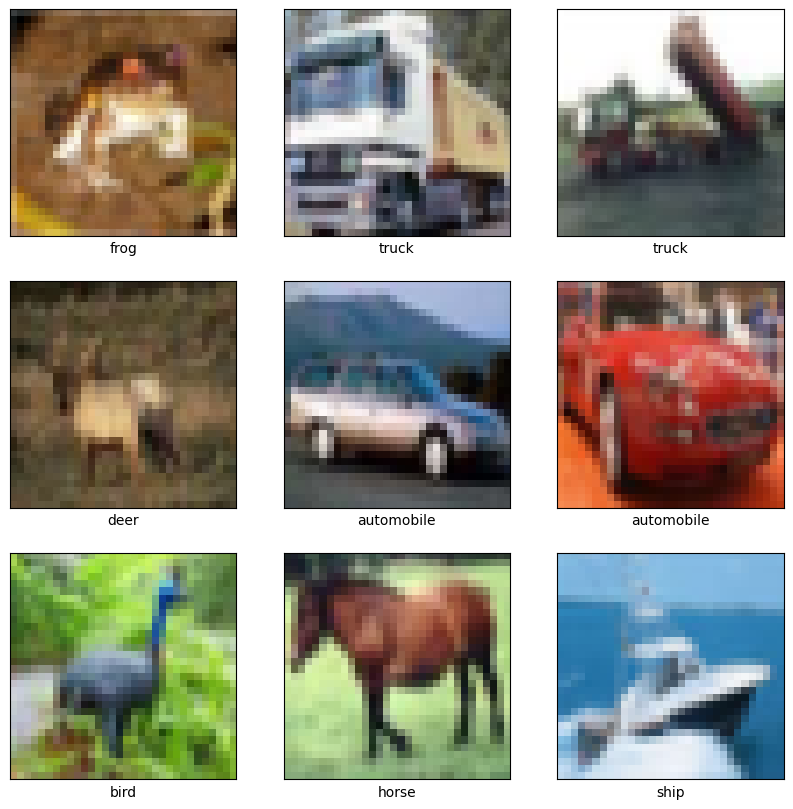

In [33]:
X_images=X.reshape(-1,3,32,32).transpose(0,2,3,1)
label_names=np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_images[i])
  plt.xlabel(label_names[y[i]])
plt.show()


In [5]:
#3) Reshape to image tensors and normalize
X_images = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32") / 255.0

In [15]:
#4) One-hot encode labels
num_classes = 10
y_cat = tf.keras.utils.to_categorical(y, num_classes=num_classes)

In [16]:
#5) Subset to keep memory small
X_train, y_train = X_images[:2000], y_cat[:2000]
X_test, y_test = X_images[2000:2500], y_cat[2000:2500]

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (2000, 32, 32, 3) (2000, 10)
Test set: (500, 32, 32, 3) (500, 10)


In [17]:
#6) Define a small MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
#7) Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
#8) Train the model
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.1085 - loss: 2.3728 - val_accuracy: 0.1480 - val_loss: 2.2864
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1661 - loss: 2.1988 - val_accuracy: 0.2280 - val_loss: 2.1249
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2036 - loss: 2.0781 - val_accuracy: 0.2160 - val_loss: 2.0718
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2381 - loss: 2.0168 - val_accuracy: 0.3080 - val_loss: 1.9854
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3171 - loss: 1.9292 - val_accuracy: 0.3040 - val_loss: 1.9636


In [20]:
#9) Evaluate on train and test sets
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)


In [21]:
#10) Predictions (probabilities → class labels)
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<Axes: >

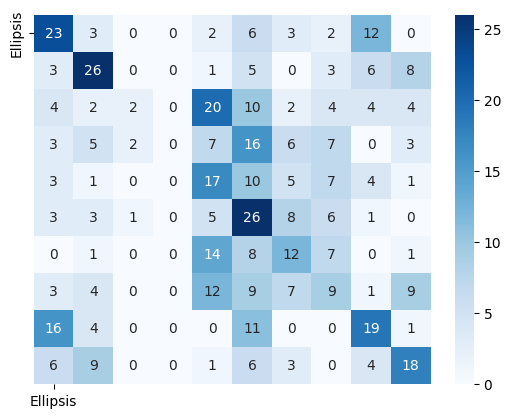

In [22]:
#11) Confusion matrix (visual)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[...], yticklabels=[...])


In [27]:
#12) Classification report
print(classification_report(y_true, y_pred, target_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])


SyntaxError: incomplete input (ipython-input-1519764454.py, line 2)